In [1]:
import bioframe
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import random
import seaborn as sns
%matplotlib inline

In [2]:
conditions = [
    't0Mit_R1_T1',
    't2_R1',
    't4DMSO_R1',
    't4ICRF_R1',
    't8DMSO_R1',
    't8ICRF_R1',
    't0Mit_R1_T2',
    't0Mit_R2',
    't2_R2',
    't4DMSO_R2',
    't4ICRF_R2',
    't8DMSO_R2',
    't8ICRF_R2'
]

long_names = {
    't0Mit_R1_T1' : 'TI-MC3C-Dpn-t0Mit-4-30',
    't2_R1' : 'TI-MC3C-Dpn-t2-4-30',
    't4DMSO_R1' : 'TI-MC3C-Dpn-t4DMSO-4-30',
    't4ICRF_R1' : 'TI-MC3C-Dpn-t4ICRF-4-30',
    't8DMSO_R1' : 'TI-MC3C-Dpn-t8DMSO-4-30',
    't8ICRF_R1' : 'TI-MC3C-Dpn-t8ICRF-4-30',
    't0Mit_R1_T2' : 'TI-MC3C-Dpn-t0Mit-4-30-T2',
    't0Mit_R2' : 'TI-MC3C-Dpn-t0Mit-4-39',
    't2_R2' : 'TI-MC3C-Dpn-t2-4-39',
    't4DMSO_R2' : 'TI-MC3C-Dpn-t4DMSO-4-39',
    't4ICRF_R2' : 'TI-MC3C-Dpn-t4ICRF-4-39',
    't8DMSO_R2' : 'TI-MC3C-Dpn-t8DMSO-4-39',
    't8ICRF_R2' : 'TI-MC3C-Dpn-t8ICRF-4-39'
}

sampleColors = {
    't0Mit_R1_T1' : '#878787',
    't2_R1' : '#E1B7A3',
    't4DMSO_R1' : '#17BECF',
    't4ICRF_R1' : '#D62728',
    't8DMSO_R1': '#0D6871',
    't8ICRF_R1': '#751616',
    't0Mit_R1_T2' : '#878787',
    't0Mit_R2' : '#878787',
    't2_R2' : '#E1B7A3',
    't4DMSO_R2' : '#17BECF',
    't4ICRF_R2' : '#D62728',
    't8DMSO_R2' :  '#0D6871',
    't8ICRF_R2' : '#751616'
}
    
sampleLineStyles = {
    't0Mit_R1_T1' : '--',
    't2_R1' : '--',
    't4DMSO_R1' : '--',
    't4ICRF_R1' : '--',
    't8DMSO_R1': '--',
    't8ICRF_R1': '--',
    't0Mit_R1_T2' : '-.',
    't0Mit_R2' : ':',
    't2_R2' : ':',
    't4DMSO_R2' : ':',
    't4ICRF_R2' : ':',
    't8DMSO_R2' :  ':',
    't8ICRF_R2' : ':'
}

In [3]:
alignmentDir = '/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/minimap/alignments'
outDataDir = '/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/minimap'
output_filenames = {}
for cond in conditions:
    output_filenames[cond] = f'{alignmentDir}/{long_names[cond]}.minimap2.output.paf'
    
#Completely unaligned walks are dropped from this output, but walks may have unaligned steps which are just not shown...
#Only primary alignments are shown in this output

In [4]:
#Read in walks as pandas dataframes
raw_walk_dfs = {}
for cond in conditions:
    raw_walk_dfs[cond] = pd.read_csv(output_filenames[cond], sep = '\t', 
                                     header = None)

In [5]:
for cond in conditions:
    raw_walk_dfs[cond].columns = ['Query_Name', 'Query_Length', 'Query_Start', 'Query_End',
                                  'Strand', 'chrom', 'Target_ChrSize', 'start', 
                                  'end', 'Match_Length', 'Alignment_Length', 'Mapping_Quality', 13, 14, 15, 16, 17, 18]

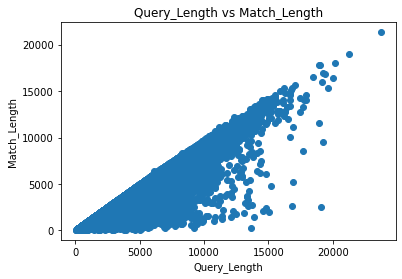

In [6]:
#Note that this includes walks where part of the walk did not align - this can be seen by plotting match length 
#from the alignment vs query length
#Sum the alignment lengths for each walk, as compared to Query_Length

#Also - some alignments will be for partial digestion fragments, and could visit more than once
#Might be nice to add a filtering step against the DpnII digested genome to check this?

test = raw_walk_dfs['t0Mit_R1_T1'].groupby(by = 'Query_Name').agg({'Match_Length': "sum", 'Alignment_Length': "sum",'Query_Length': 'mean'})

plt.scatter(test['Query_Length'], test['Match_Length'])
plt.title('Query_Length vs Match_Length')
plt.xlabel('Query_Length')
plt.ylabel('Match_Length')

plt.savefig(f'{outDataDir}/figures/ScatterPlot_QueryvsMatchLength_t0Mit_R1_T1.png')

#So not all walks are fully aligned as expected - what does distribution of difference look like?

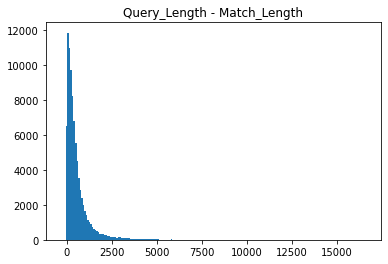

In [7]:
#Also by plotting the distribution of the difference between query and match length
#Sum the alignment lengths for each walk, as compared to Query_Length

test = raw_walk_dfs['t0Mit_R1_T1'].groupby(by = 'Query_Name').agg({'Match_Length': "sum", 'Alignment_Length': "sum",'Query_Length': 'mean'})
test['Difference'] = test['Query_Length']-test['Match_Length']
plt.hist(test['Difference'], bins = 200)
plt.title('Query_Length - Match_Length')

plt.savefig(f'{outDataDir}/figures/Histogram_QueryvsMatchLengthDifference_t0Mit_R1_T1.png')

In [8]:
#Going ahead with it for now...but might want to filter out walks missing more than a certain threshold of bp in future

In [9]:
###Complement from bioframe might be helpful here - for each walk, to figure out how many NA regions there are, and if 
#a full walk or not
#Also, could go from start to end of mapped fragments, rather than entire length of walk, since if a NAs occur on either side
#of mapped regions that is ok, just bad if they are in the middle. 

In [10]:
#Would be nice to sort by position in walk instead of position in genome - fast! Don't need to group. 
sorted_dfs = {}
for cond in conditions:
    sorted_dfs[cond] = raw_walk_dfs[cond].sort_values(['Query_Name', 'Query_Start']).reset_index(drop = True)

In [11]:
#Annotate walks - add compartment info for each fragment - starting with t8 DMSO HiC Eig1, since t0 and t2 don't have 
#good compartment data...for t4 and t8 timepoints might want to use own eigens in future?

In [12]:
#Add compartment type

In [13]:
eigsDir = "/nl/umw_job_dekker/users/eh37w/Topo-Inhib/Manuscript/Fig1_MitoticReleaseWithICRF"

In [15]:
#Eigens - t8 DMSO sorted, R1R2 combined, deep data
#read in eigs
eigs = pd.read_csv(f'{eigsDir}/data/TI-HiC-Dpn-HeLa-MitoticRelease-t8hr-DMSO-6hr-G1Sort-4-44-and-4-49-R1R2.100kb.mapq30.allchroms.byarm.eigs.cis.vecs.txt', sep='\t')

In [16]:
eigs.head()

,chrom,start,end,gene_count,gene_coverage,E1,E2,E3
0,chr1,0,100000,610,0.22742,NaN,NaN,NaN
1,chr1,100000,200000,676,0.42396,NaN,NaN,NaN
2,chr1,200000,300000,97,1.00000,NaN,NaN,NaN
3,chr1,300000,400000,388,0.46231,NaN,NaN,NaN
4,chr1,400000,500000,228,0.07159,NaN,NaN,NaN


In [17]:
#calling A vs B compartments in each sample
eigsA = eigs[eigs['E1'] > 0]
    
eigsB = eigs[eigs['E1'] < 0]

In [18]:
eigsA.head()

,chrom,start,end,gene_count,gene_coverage,E1,E2,E3
8,chr1,800000,900000,446,0.55494,0.877725,0.046221,-0.768240
9,chr1,900000,1000000,433,0.64650,0.985383,-0.256022,-0.799349
10,chr1,1000000,1100000,418,0.48778,1.014058,-0.084677,-0.780006
11,chr1,1100000,1200000,1370,0.69623,1.174692,-0.133088,-1.017117
12,chr1,1200000,1300000,572,0.99497,0.857742,-0.473072,-0.199672


In [19]:
eigsB.head()

,chrom,start,end,gene_count,gene_coverage,E1,E2,E3
38,chr1,3800000,3900000,291,0.30582,-0.707765,1.497110,-0.145888
40,chr1,4000000,4100000,229,0.16744,-0.703838,1.150357,-0.273866
41,chr1,4100000,4200000,161,0.84343,-1.021461,1.098902,-0.286419
42,chr1,4200000,4300000,215,0.09138,-1.153067,0.920262,-0.466578
43,chr1,4300000,4400000,96,0.01100,-1.290098,0.741349,-0.655697


In [20]:
#Merge adjacent bins into one compartment region, give each a unique index - unique across both types
eigsA_Ranges = bioframe.merge(eigsA[['chrom', 'start', 'end']], min_dist = 0).reset_index(drop = True)
eigsA_Ranges['comp_type'] = 'A'
eigsA_Ranges

,chrom,start,end,n_intervals,comp_type
0,chr1,800000,3800000,30,A
1,chr1,6100000,12300000,62,A
2,chr1,12500000,12600000,1,A
3,chr1,15600000,17100000,15,A
4,chr1,17200000,29600000,124,A
...,...,...,...,...,...
1320,chrX,148500000,153400000,49,A
1321,chrX,153500000,154900000,14,A
1322,chrY,13300000,13500000,2,A
1323,chrY,21100000,21200000,1,A


In [21]:
eigsB_Ranges = bioframe.merge(eigsB[['chrom', 'start', 'end']], min_dist = 0).reset_index(drop = True)
eigsB_Ranges['comp_type'] = 'B'
eigsB_Ranges

,chrom,start,end,n_intervals,comp_type
0,chr1,3800000,3900000,1,B
1,chr1,4000000,6100000,21,B
2,chr1,12300000,12500000,2,B
3,chr1,12600000,12900000,3,B
4,chr1,13800000,15600000,18,B
...,...,...,...,...,...
1290,chrX,142800000,143200000,4,B
1291,chrX,143300000,146900000,36,B
1292,chrX,147100000,148500000,14,B
1293,chrY,13200000,13300000,1,B


In [22]:
#Combine A and B to get unique indices, then split again for overlaps
eigsAB_Ranges = eigsA_Ranges.append(eigsB_Ranges).reset_index(drop=True).reset_index()
eigsAB_Ranges

,index,chrom,start,end,n_intervals,comp_type
0,0,chr1,800000,3800000,30,A
1,1,chr1,6100000,12300000,62,A
2,2,chr1,12500000,12600000,1,A
3,3,chr1,15600000,17100000,15,A
4,4,chr1,17200000,29600000,124,A
...,...,...,...,...,...,...
2615,2615,chrX,142800000,143200000,4,B
2616,2616,chrX,143300000,146900000,36,B
2617,2617,chrX,147100000,148500000,14,B
2618,2618,chrY,13200000,13300000,1,B


In [23]:
eigsA_Ranges = eigsAB_Ranges[eigsAB_Ranges['comp_type'] == 'A']
eigsB_Ranges = eigsAB_Ranges[eigsAB_Ranges['comp_type'] == 'B']

In [24]:
#Overlap A and B ranges with cwalk steps - assign each step as A or B based on overlap, change '0' to np.nan
#Add compartment index

In [25]:
overlap_dfs = {} #slow, but better here than doing compartment type again for each iteration
for cond in conditions:
    df = sorted_dfs[cond].iloc[:, 0:12].copy()
    overlapA = bioframe.overlap(df, eigsA_Ranges, how = 'left', suffixes = ('', '_A'), keep_order = True)
    overlapAB = bioframe.overlap(overlapA, eigsB_Ranges, how = 'left', suffixes = ('', '_B'), keep_order = True)
    overlapAB['Frag_Comp_Type'] = 0
    overlapAB['Frag_Comp_Type'][~overlapAB['index_A'].isna()] = 'A'
    overlapAB['Frag_Comp_Type'][~overlapAB['index_B'].isna()] = 'B'
    overlapAB['Frag_Comp_Index'] = np.nan
    overlapAB['Frag_Comp_Index'][~overlapAB['index_A'].isna()] = overlapAB['index_A']
    overlapAB['Frag_Comp_Index'][~overlapAB['index_B'].isna()] = overlapAB['index_B']
    df = overlapAB.drop(labels = ['index_A', 'chrom_A', 'start_A', 'end_A', 'n_intervals_A', 'index_B', 'chrom_B', 'start_B', 'end_B', 'n_intervals_B', 'comp_type_A', 'comp_type_B'],
              axis = 1)
    
    #Compartment Type of entire walk - A, B, AB, NA
    grouped_df = df.groupby(by = 'Query_Name')
    summary_table = pd.DataFrame()
    summary_table['Fragment_Number'] = grouped_df.size()
    comp_types = []
    for key,group_df in grouped_df:
        comps = group_df['Frag_Comp_Type'].unique().tolist()
        comps = ''.join(sorted([str(i) for i in comps]))
        comp_types.append(comps)
    summary_table['Walk_Comp_Type'] = comp_types
    summary_table['Walk_Comp_Type'][summary_table['Walk_Comp_Type'].isin(['0', '0A', '0B', '0AB'])] = np.nan
    df = df.merge(summary_table['Walk_Comp_Type'], left_on = 'Query_Name', right_index = True)
    overlap_dfs[cond] = df

<ipython-input-25-40f55d54f75c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overlapAB['Frag_Comp_Type'][~overlapAB['index_A'].isna()] = 'A'
<ipython-input-25-40f55d54f75c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overlapAB['Frag_Comp_Index'][~overlapAB['index_A'].isna()] = overlapAB['index_A']
<ipython-input-25-40f55d54f75c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Walk_Comp_Type'][summary_table['W

In [26]:
#Shuffle steps within each walk for permutations - just 5x for now to test
#Just shuffle all rows, then resort by query_name - doesn't need to be grouped for the shuffle
iterations = [0, 1, 2, 3, 4]
permuted_dfs = {}
for cond in conditions:
    permuted_dfs[cond] = {}
    for i in iterations:
        df = overlap_dfs[cond].copy()
        df_shuff = df.iloc[np.random.permutation(df.index)].reset_index(drop=True).sort_values(['Query_Name']).reset_index(drop=True)
        df_shuff['Iteration'] = i
        permuted_dfs[cond][i] = df_shuff

In [27]:
#Calculate step size for cis steps in walks
#Difference between midpoint positions of adjacent rows within each group, but only if chromosomes match
for cond in conditions:
    df = overlap_dfs[cond]
    df['mid'] = (df['start'] + df['end'])//2
    df['dist'] = np.nan
    df['dist'] = df.iloc[np.where((df['chrom'] == df['chrom'].shift()) & (df['Query_Name'] == df['Query_Name'].shift()))].mid.diff()
    overlap_dfs[cond] = df

In [28]:
#Add columns for whether step changes chromosome or compartment type
for cond in conditions:
    df = overlap_dfs[cond].copy()
    
    #Adding in whether a step changes chromosomes
    df['Trans_Step'] = df['chrom'] != df['chrom'].shift()
    df['Trans_Step'].iloc[np.where(df['Query_Name'] != df['Query_Name'].shift())] = np.nan
    
    #Adding in whether a step compartment type, or compartment index
    df['Inter_Comp_Type_Step'] = df['Frag_Comp_Type'] != df['Frag_Comp_Type'].shift()
    df['Inter_Comp_Type_Step'].iloc[np.where(df['Query_Name'] != df['Query_Name'].shift())] = np.nan

    df['Inter_Comp_Index_Step'] = df['Frag_Comp_Index'] != df['Frag_Comp_Index'].shift()
    df['Inter_Comp_Index_Step'].iloc[np.where(df['Query_Name'] != df['Query_Name'].shift())] = np.nan
    overlap_dfs[cond] = df

/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
df = overlap_dfs['t0Mit_R1_T1'].copy()
df[df['Query_Name'] == 'm54328U_200808_234754/101320295/ccs']

,Query_Name,Query_Length,Query_Start,Query_End,Strand,chrom,Target_ChrSize,start,end,Match_Length,Alignment_Length,Mapping_Quality,Frag_Comp_Type,Frag_Comp_Index,Walk_Comp_Type,mid,dist,Trans_Step,Inter_Comp_Type_Step,Inter_Comp_Index_Step
3519,m54328U_200808_234754/101320295/ccs,4047,0,143,+,chr1,249250621,162446880,162447023,112,143,60,A,64,NaN,162446951,NaN,NaN,NaN,NaN
3520,m54328U_200808_234754/101320295/ccs,4047,171,1564,+,chr10,135534747,42387090,42388537,701,1447,5,B,1430,NaN,42387813,NaN,1.0,1.0,1.0
3521,m54328U_200808_234754/101320295/ccs,4047,1642,3037,-,chr10,135534747,42387090,42388537,754,1448,5,B,1430,NaN,42387813,-62480887,0.0,0.0,0.0
3522,m54328U_200808_234754/101320295/ccs,4047,3060,3545,+,chr1,249250621,158524352,158524835,465,485,60,B,1384,NaN,158524593,NaN,1.0,0.0,1.0
3523,m54328U_200808_234754/101320295/ccs,4047,3571,3675,-,chr1,249250621,168282314,168282418,104,104,60,A,67,NaN,168282366,125894553,0.0,1.0,1.0
3524,m54328U_200808_234754/101320295/ccs,4047,3675,3775,-,chr1,249250621,158661946,158662046,100,100,60,B,1384,NaN,158661996,-9620370,0.0,1.0,1.0
3525,m54328U_200808_234754/101320295/ccs,4047,3780,4038,+,chr1,249250621,143741490,143741748,253,258,0,0,NaN,NaN,143741619,-14920377,0.0,1.0,1.0


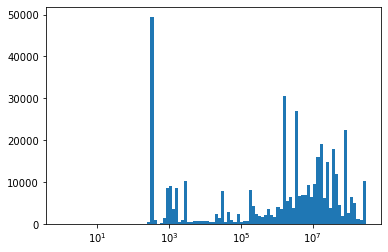

In [30]:
logbins = np.geomspace(1, 3e8, 100)
plt.hist(abs(df['dist']), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_AllRows_t0Mit_R1_T1.png')

#This looks pretty bad

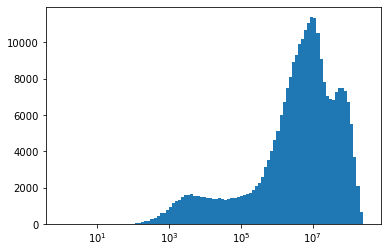

In [31]:
#Does this look better if we drop the na rows?
dist_dropna = df['dist'].dropna()
plt.hist(abs(dist_dropna), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_DropNARows_t0Mit_R1_T1.png')

#yes - much better

In [32]:
#Looks different from plot from Filipe's scripts...but not so bad now that I am using log bins
#There are definitely still some alignments that are probably to the same fragment though

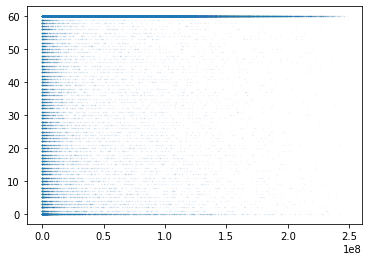

In [33]:
plt.scatter(abs(df['dist']), df['Mapping_Quality'], s = .1, alpha = 0.1)

plt.savefig(f'{outDataDir}/figures/Scatter_DistvsMappingQuality_t0Mit_R1_T1.png')


In [34]:
#What about dropping walks with low mapping quality?
df_good_mapQ = df.groupby('Query_Name').filter(lambda g: (g.Mapping_Quality >= 60).all())

In [35]:
df_good_mapQ

,Query_Name,Query_Length,Query_Start,Query_End,Strand,chrom,Target_ChrSize,start,end,Match_Length,Alignment_Length,Mapping_Quality,Frag_Comp_Type,Frag_Comp_Index,Walk_Comp_Type,mid,dist,Trans_Step,Inter_Comp_Type_Step,Inter_Comp_Index_Step
0,m54328U_200808_234754/100007962/ccs,644,6,644,+,chr7,159138663,18672478,18673116,638,638,60,B,2366,B,18672797,NaN,NaN,NaN,NaN
1,m54328U_200808_234754/100007996/ccs,2921,0,526,-,chr12,133851895,109064530,109065055,438,528,60,A,246,AB,109064792,NaN,NaN,NaN,NaN
2,m54328U_200808_234754/100007996/ccs,2921,532,858,+,chr12,133851895,105539661,105539984,297,326,60,A,244,AB,105539822,NaN,0.0,0.0,1.0
3,m54328U_200808_234754/100007996/ccs,2921,860,1480,+,chr12,133851895,78899996,78900612,414,621,60,B,1556,AB,78900304,-26639518,0.0,1.0,1.0
4,m54328U_200808_234754/100007996/ccs,2921,1496,2894,+,chr12,133851895,69226712,69227974,960,1406,60,A,232,AB,69227343,-9672961,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420539,m54328U_200808_234754/99945127/ccs,4268,2726,3390,-,chr5,180915260,31983302,31983966,664,664,60,A,882,AB,31983634,2449877,0.0,0.0,1.0
420540,m54328U_200808_234754/99945127/ccs,4268,3388,3936,-,chr5,180915260,45131292,45131840,545,548,60,B,2200,AB,45131566,13147932,0.0,1.0,1.0
420541,m54328U_200808_234754/99945127/ccs,4268,3947,4265,-,chr5,180915260,45129019,45129337,318,318,60,B,2200,AB,45129178,-2388,0.0,0.0,0.0
420542,m54328U_200808_234754/99945145/ccs,2650,31,1217,-,chr2,243199373,74165877,74167064,1181,1187,60,A,498,AB,74166470,NaN,NaN,NaN,NaN


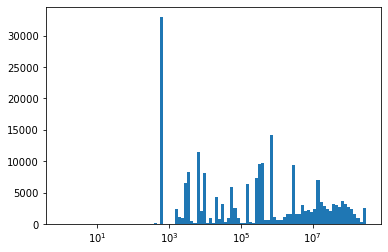

In [36]:
logbins = np.geomspace(1, 3e8, 100)
plt.hist(abs(df_good_mapQ['dist']), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_GoodMapQOnly_WithNA_t0Mit_R1_T1.png')


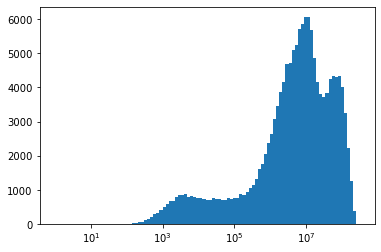

In [37]:
#drop na here too
dist_dropna_goodmapq = df_good_mapQ['dist'].dropna()
plt.hist(abs(dist_dropna_goodmapq), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_GoodMapQOnly_DropNA_t0Mit_R1_T1.png')

#Yes - looks better, but still different from R based analysis...

In [38]:
#Trying again but filtering for only walks that don't lose more than 200bp between read and alignment (might want to
#change this threshold, but seems ok to try to start?)

test = overlap_dfs['t0Mit_R1_T1'].copy()

test[['Query_Length', 'Match_Length', 'Alignment_Length']] = test[['Query_Length', 'Match_Length', 'Alignment_Length']].astype(np.int64)
test.dtypes

Query_Name                object
Query_Length               int64
Query_Start               object
Query_End                 object
Strand                    object
chrom                     object
Target_ChrSize            object
start                     object
end                       object
Match_Length               int64
Alignment_Length           int64
Mapping_Quality           object
Frag_Comp_Type            object
Frag_Comp_Index           object
Walk_Comp_Type            object
mid                       object
dist                      object
Trans_Step               float64
Inter_Comp_Type_Step     float64
Inter_Comp_Index_Step    float64
dtype: object

In [39]:
groupedtest = test.groupby(by = 'Query_Name').agg({'Match_Length': "sum", 'Alignment_Length': "sum",'Query_Length': 'mean'})

In [40]:
groupedtest

,Match_Length,Alignment_Length,Query_Length
Query_Name,,,
m54328U_200808_234754/100007962/ccs,638,638,644
m54328U_200808_234754/100007996/ccs,2109,2881,2921
m54328U_200808_234754/100008084/ccs,3901,4148,4171
m54328U_200808_234754/100008088/ccs,2732,2756,2818
m54328U_200808_234754/100008110/ccs,2551,3997,3550
...,...,...,...
m54328U_200808_234754/99944936/ccs,1195,1215,1377
m54328U_200808_234754/99945112/ccs,2261,2532,2585
m54328U_200808_234754/99945127/ccs,3968,4213,4268


In [41]:
groupedtest['ReadvsAlignmentDiff'] = groupedtest['Query_Length']-groupedtest['Match_Length']
groupedtest_filtered_full = groupedtest[groupedtest['ReadvsAlignmentDiff'] < 200]
groupedtest_filtered_partial = groupedtest[groupedtest['ReadvsAlignmentDiff'] >= 200]

In [42]:
groupedtest_filtered_full

,Match_Length,Alignment_Length,Query_Length,ReadvsAlignmentDiff
Query_Name,,,,
m54328U_200808_234754/100007962/ccs,638,638,644,6
m54328U_200808_234754/100008088/ccs,2732,2756,2818,86
m54328U_200808_234754/100008669/ccs,1418,1503,1530,112
m54328U_200808_234754/100009401/ccs,1789,1870,1928,139
m54328U_200808_234754/100009452/ccs,1564,1564,1576,12
...,...,...,...,...
m54328U_200808_234754/99944290/ccs,2781,2847,2944,163
m54328U_200808_234754/99944765/ccs,4326,4400,4410,84
m54328U_200808_234754/99944853/ccs,2006,2058,2135,129


In [43]:
groupedtest_filtered_partial

,Match_Length,Alignment_Length,Query_Length,ReadvsAlignmentDiff
Query_Name,,,,
m54328U_200808_234754/100007996/ccs,2109,2881,2921,812
m54328U_200808_234754/100008084/ccs,3901,4148,4171,270
m54328U_200808_234754/100008110/ccs,2551,3997,3550,999
m54328U_200808_234754/100008185/ccs,4922,5843,5894,972
m54328U_200808_234754/100008363/ccs,3103,3627,3643,540
...,...,...,...,...
m54328U_200808_234754/99944800/ccs,2185,2785,2802,617
m54328U_200808_234754/99944918/ccs,1672,2013,2038,366
m54328U_200808_234754/99945112/ccs,2261,2532,2585,324


In [44]:
mask_full_walks = test['Query_Name'].isin(groupedtest_filtered_full.index)
test_filtered_full = test[mask_full_walks]

mask_partial_walks = test['Query_Name'].isin(groupedtest_filtered_partial.index)
test_filtered_partial = test[mask_partial_walks]

In [45]:
test_filtered_full

,Query_Name,Query_Length,Query_Start,Query_End,Strand,chrom,Target_ChrSize,start,end,Match_Length,Alignment_Length,Mapping_Quality,Frag_Comp_Type,Frag_Comp_Index,Walk_Comp_Type,mid,dist,Trans_Step,Inter_Comp_Type_Step,Inter_Comp_Index_Step
0,m54328U_200808_234754/100007962/ccs,644,6,644,+,chr7,159138663,18672478,18673116,638,638,60,B,2366,B,18672797,NaN,NaN,NaN,NaN
12,m54328U_200808_234754/100008088/ccs,2818,5,1148,+,chr12,133851895,44754607,44755751,1141,1144,60,B,1543,AB,44755179,NaN,NaN,NaN,NaN
13,m54328U_200808_234754/100008088/ccs,2818,1145,1282,+,chr12,133851895,40391230,40391367,136,137,60,A,219,AB,40391298,-86482409,0.0,1.0,1.0
14,m54328U_200808_234754/100008088/ccs,2818,1327,1867,+,chr12,133851895,40285684,40286224,537,540,60,B,1540,AB,40285954,-105344,0.0,1.0,1.0
15,m54328U_200808_234754/100008088/ccs,2818,1866,2028,+,chr12,133851895,44482234,44482396,162,162,60,B,1543,AB,44482315,4196361,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420529,m54328U_200808_234754/99944936/ccs,1377,430,616,-,chr17,81195210,81117900,81118086,186,186,60,A,416,A,81117993,-87647694,0.0,0.0,0.0
420530,m54328U_200808_234754/99944936/ccs,1377,623,1187,-,chr17,81195210,76697215,76697771,544,564,60,A,416,A,76697493,-4420500,0.0,0.0,0.0
420531,m54328U_200808_234754/99944936/ccs,1377,1186,1310,+,chr17,81195210,76696482,76696606,124,124,60,A,416,A,76696544,-949,0.0,0.0,0.0
420542,m54328U_200808_234754/99945145/ccs,2650,31,1217,-,chr2,243199373,74165877,74167064,1181,1187,60,A,498,AB,74166470,NaN,NaN,NaN,NaN


In [46]:
test_filtered_partial

,Query_Name,Query_Length,Query_Start,Query_End,Strand,chrom,Target_ChrSize,start,end,Match_Length,Alignment_Length,Mapping_Quality,Frag_Comp_Type,Frag_Comp_Index,Walk_Comp_Type,mid,dist,Trans_Step,Inter_Comp_Type_Step,Inter_Comp_Index_Step
1,m54328U_200808_234754/100007996/ccs,2921,0,526,-,chr12,133851895,109064530,109065055,438,528,60,A,246,AB,109064792,NaN,NaN,NaN,NaN
2,m54328U_200808_234754/100007996/ccs,2921,532,858,+,chr12,133851895,105539661,105539984,297,326,60,A,244,AB,105539822,NaN,0.0,0.0,1.0
3,m54328U_200808_234754/100007996/ccs,2921,860,1480,+,chr12,133851895,78899996,78900612,414,621,60,B,1556,AB,78900304,-26639518,0.0,1.0,1.0
4,m54328U_200808_234754/100007996/ccs,2921,1496,2894,+,chr12,133851895,69226712,69227974,960,1406,60,A,232,AB,69227343,-9672961,0.0,1.0,1.0
5,m54328U_200808_234754/100008084/ccs,4171,0,620,+,chr9,141213431,127725979,127726598,581,620,60,A,1232,A,127726288,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,m54328U_200808_234754/99945237/ccs,4417,765,822,-,chr6,171115067,42202052,42202109,45,57,5,A,970,AB,42202080,2522658,0.0,1.0,1.0
420547,m54328U_200808_234754/99945237/ccs,4417,830,1377,+,chr6,171115067,39661853,39662400,501,547,60,B,2277,AB,39662126,-2539954,0.0,1.0,1.0
420548,m54328U_200808_234754/99945237/ccs,4417,1375,1822,+,chr6,171115067,39650275,39650722,261,447,60,B,2277,AB,39650498,-11628,0.0,0.0,0.0
420549,m54328U_200808_234754/99945237/ccs,4417,1827,2191,+,chr6,171115067,39840622,39840986,364,364,60,B,2277,AB,39840804,190306,0.0,0.0,0.0


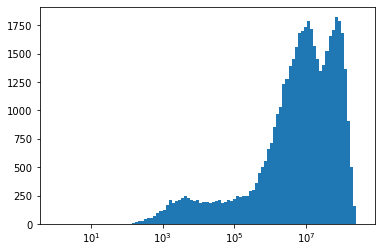

In [47]:
dist_filtered_full = test_filtered_full['dist'].dropna()
plt.hist(abs(dist_filtered_full), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_FullWalksOnly_DropNA_t0Mit_R1_T1.png')


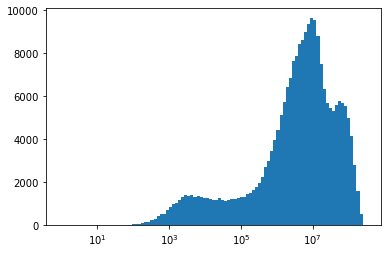

In [48]:
dist_filtered_partial = test_filtered_partial['dist'].dropna()
plt.hist(abs(dist_filtered_partial), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_PartialWalksOnly_DropNA_t0Mit_R1_T1.png')

In [49]:
#What about excluding all walks going to 3 or more chromosomes? (Class 3)
df_ChromNumIndex = df.groupby('Query_Name').agg({'chrom': 'nunique'})
df_1and2ChromIndex = df_ChromNumIndex[df_ChromNumIndex['chrom'] < 3]

In [50]:
df_1and2ChromIndex

,chrom
Query_Name,
m54328U_200808_234754/100007962/ccs,1
m54328U_200808_234754/100007996/ccs,1
m54328U_200808_234754/100008084/ccs,2
m54328U_200808_234754/100008088/ccs,1
m54328U_200808_234754/100008110/ccs,1
...,...
m54328U_200808_234754/99944936/ccs,1
m54328U_200808_234754/99945112/ccs,1
m54328U_200808_234754/99945127/ccs,1


In [51]:
df_1and2Chrom = df[df['Query_Name'].isin(df_1and2ChromIndex.index)]
df_1and2Chrom

,Query_Name,Query_Length,Query_Start,Query_End,Strand,chrom,Target_ChrSize,start,end,Match_Length,Alignment_Length,Mapping_Quality,Frag_Comp_Type,Frag_Comp_Index,Walk_Comp_Type,mid,dist,Trans_Step,Inter_Comp_Type_Step,Inter_Comp_Index_Step
0,m54328U_200808_234754/100007962/ccs,644,6,644,+,chr7,159138663,18672478,18673116,638,638,60,B,2366,B,18672797,NaN,NaN,NaN,NaN
1,m54328U_200808_234754/100007996/ccs,2921,0,526,-,chr12,133851895,109064530,109065055,438,528,60,A,246,AB,109064792,NaN,NaN,NaN,NaN
2,m54328U_200808_234754/100007996/ccs,2921,532,858,+,chr12,133851895,105539661,105539984,297,326,60,A,244,AB,105539822,NaN,0.0,0.0,1.0
3,m54328U_200808_234754/100007996/ccs,2921,860,1480,+,chr12,133851895,78899996,78900612,414,621,60,B,1556,AB,78900304,-26639518,0.0,1.0,1.0
4,m54328U_200808_234754/100007996/ccs,2921,1496,2894,+,chr12,133851895,69226712,69227974,960,1406,60,A,232,AB,69227343,-9672961,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,m54328U_200808_234754/99945237/ccs,4417,765,822,-,chr6,171115067,42202052,42202109,45,57,5,A,970,AB,42202080,2522658,0.0,1.0,1.0
420547,m54328U_200808_234754/99945237/ccs,4417,830,1377,+,chr6,171115067,39661853,39662400,501,547,60,B,2277,AB,39662126,-2539954,0.0,1.0,1.0
420548,m54328U_200808_234754/99945237/ccs,4417,1375,1822,+,chr6,171115067,39650275,39650722,261,447,60,B,2277,AB,39650498,-11628,0.0,0.0,0.0
420549,m54328U_200808_234754/99945237/ccs,4417,1827,2191,+,chr6,171115067,39840622,39840986,364,364,60,B,2277,AB,39840804,190306,0.0,0.0,0.0


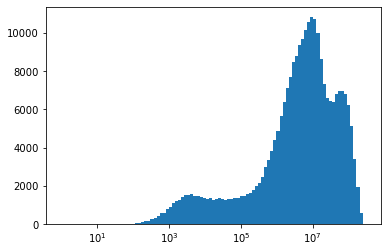

In [52]:
dist_1and2Chrom = df_1and2Chrom['dist'].dropna()
plt.hist(abs(dist_1and2Chrom), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_1and2ChromWalksOnly_DropNA_t0Mit_R1_T1.png')

#Still has both peaks, but probably not a bad idea to use this filter for other graphs

In [53]:
#same thing for permutations - calculate dist
for cond in conditions:
    for i in iterations:
        df = permuted_dfs[cond][i]
        df['mid'] = (df['start'] + df['end'])//2
        df['dist'] = np.nan
        df['dist'] = df.iloc[np.where((df['chrom'] == df['chrom'].shift()) & (df['Query_Name'] == df['Query_Name'].shift()))].mid.diff()
        permuted_dfs[cond][i] = df

In [54]:
#For permutations, columns for whether step changes chromosome or compartment type
for cond in conditions:
    for i in iterations:
        df = permuted_dfs[cond][i].copy()
    
        #Adding in whether a step changes chromosomes
        df['Trans_Step'] = df['chrom'] != df['chrom'].shift()
        df['Trans_Step'].iloc[np.where(df['Query_Name'] != df['Query_Name'].shift())] = np.nan

        #Adding in whether a step compartment type, or compartment index
        df['Inter_Comp_Type_Step'] = df['Frag_Comp_Type'] != df['Frag_Comp_Type'].shift()
        df['Inter_Comp_Type_Step'].iloc[np.where(df['Query_Name'] != df['Query_Name'].shift())] = np.nan

        df['Inter_Comp_Index_Step'] = df['Frag_Comp_Index'] != df['Frag_Comp_Index'].shift()
        df['Inter_Comp_Index_Step'].iloc[np.where(df['Query_Name'] != df['Query_Name'].shift())] = np.nan
        permuted_dfs[cond][i] = df

/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


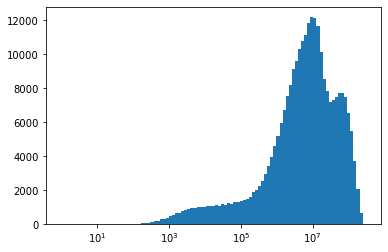

In [55]:
#for first iteration, try plotting histogram of dist as well
dist_dropna_permute = permuted_dfs['t0Mit_R1_T1'][0]['dist'].copy().dropna()
plt.hist(abs(dist_dropna_permute), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_DropNA_t0Mit_R1_T1_Permuted.png')

#Looks up shifted, as expected

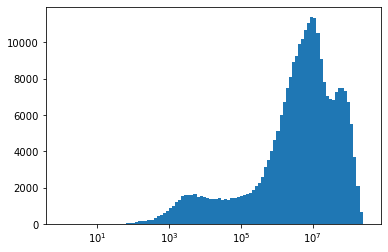

In [56]:
#I calculated dist as mid to mid, but Filipe's script does end to end - try that as well
test2 = overlap_dfs['t0Mit_R1_T1'].copy()

#Calculate step size for cis steps in walks
#Difference between endpoints of adjacent rows within each group, but only if chromosomes match

test2['dist2'] = np.nan
test2['dist2'] = test2.iloc[np.where((test2['chrom'] == test2['chrom'].shift()) & (test2['Query_Name'] == test2['Query_Name'].shift()))].end.diff()
    
dist_2 = test2['dist2'].dropna()
plt.hist(abs(dist_2), bins = logbins)
plt.xscale('log')

plt.savefig(f'{outDataDir}/figures/Histogram_Dist_Logbins_DropNA_EndtoEndDist_t0Mit_R1_T1.png')

#Still has extra peak

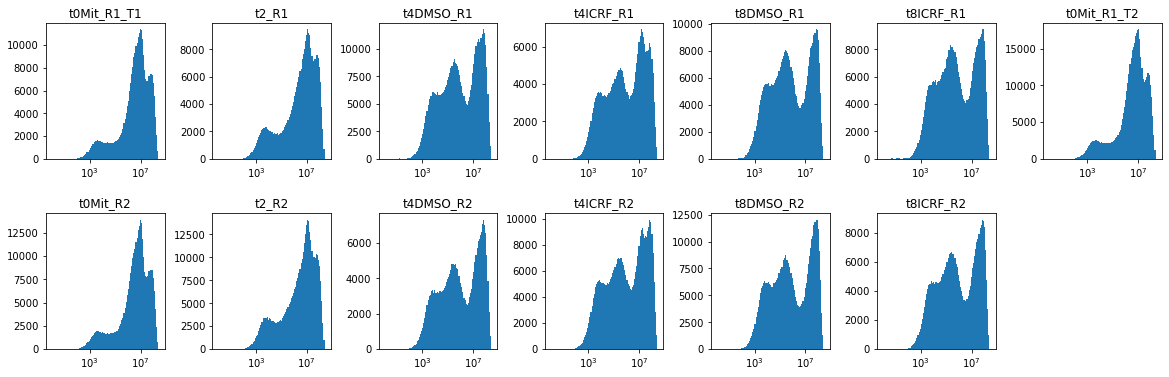

In [57]:
#Plot histogram for all samples, without filtering - is extra peak seen in G1 samples as well?

fig = plt.figure(figsize=(20, 6))

gs1 = GridSpec(nrows = 2, ncols = 7, hspace = 0.4, wspace = 0.4)

for i, cond in enumerate(conditions):
    ax = plt.subplot(gs1[i])
    dist_dropna = overlap_dfs[cond]['dist'].copy().dropna()
    plt.hist(abs(dist_dropna), bins = logbins)
    plt.xscale('log')
    plt.title(cond)

plt.savefig(f'{outDataDir}/figures/MRICRF_Histograms_Dist_Logbins_DropNA_AllSamples.png')

/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr

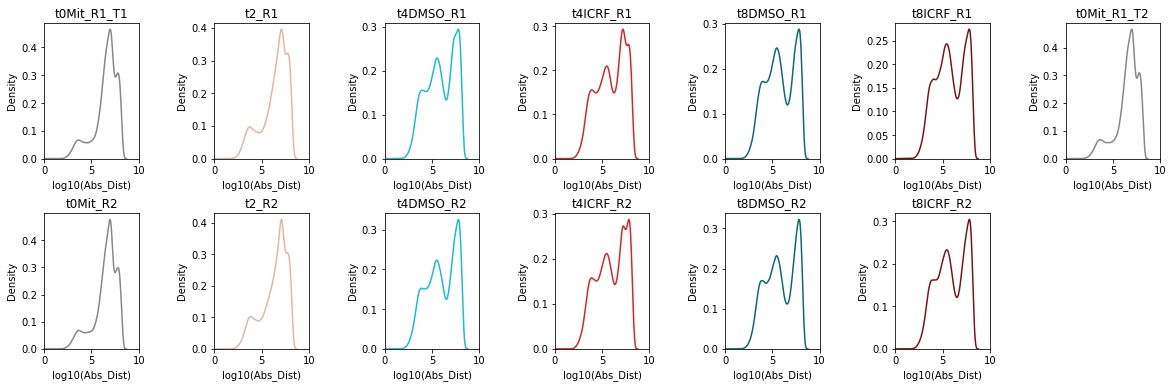

In [58]:
#Same thing but with kernel density plots
fig = plt.figure(figsize=(20, 6))

gs1 = GridSpec(nrows = 2, ncols = 7, hspace = .4, wspace = .8)

for i, cond in enumerate(conditions):
    ax = plt.subplot(gs1[i])
    dist_dropna = pd.DataFrame({'Dist' : overlap_dfs[cond]['dist'].copy()})
    dist_dropna = dist_dropna.replace([np.inf, -np.inf], np.nan).dropna()
    dist_dropna['Abs_Dist'] = np.log10(abs(dist_dropna['Dist'])).replace([np.inf, -np.inf], np.nan).dropna()    
    sns.kdeplot(data = dist_dropna, x = 'Abs_Dist', ax = ax, color = sampleColors[cond])
    plt.title(cond)
    plt.xlabel('log10(Abs_Dist)')
    plt.xlim(0, 10)
    
plt.savefig(f'{outDataDir}/figures/MRICRF_Density_Dist_Logbins_DropNA_AllSamples.png')

/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/eh37w/bin/miniconda3/envs/minimap-env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr

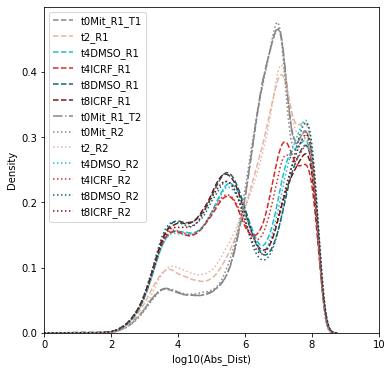

In [59]:
#Kernel density plots - overlay
fig = plt.figure(figsize=(6, 6))

for i, cond in enumerate(conditions):
    dist_dropna = pd.DataFrame({'Dist' : overlap_dfs[cond]['dist'].copy()})
    dist_dropna = dist_dropna.replace([np.inf, -np.inf], np.nan).dropna()
    dist_dropna['Abs_Dist'] = np.log10(abs(dist_dropna['Dist'])).replace([np.inf, -np.inf], np.nan).dropna()    
    sns.kdeplot(data = dist_dropna, x = 'Abs_Dist', color = sampleColors[cond], ls = sampleLineStyles[cond], label = cond)
plt.legend()
plt.xlabel('log10(Abs_Dist)')
plt.xlim(0, 10)

plt.savefig(f'{outDataDir}/figures/MRICRF_Density_Dist_Logbins_DropNA_AllSamplesOverlay.png')

In [60]:
df = overlap_dfs[cond].copy()
grouped_df = df.groupby(by = 'Query_Name')
grouped_df['Walk_Comp_Type'].first()

Query_Name
m54328U_201123_201850/100007998/ccs       A
m54328U_201123_201850/100008086/ccs    None
m54328U_201123_201850/100008089/ccs       A
m54328U_201123_201850/100008112/ccs      AB
m54328U_201123_201850/100008282/ccs       A
                                       ... 
m54328U_201123_201850/99944929/ccs        B
m54328U_201123_201850/99945156/ccs        B
m54328U_201123_201850/99945277/ccs       AB
m54328U_201123_201850/99945283/ccs        A
m54328U_201123_201850/99945311/ccs        B
Name: Walk_Comp_Type, Length: 96409, dtype: object

In [61]:
#Summarize walks - still slow...
summarized_walks = {}

for cond in conditions:
    df = overlap_dfs[cond].copy()
    
    #Number of fragments in walk
    grouped_df = df.groupby(by = 'Query_Name')
    summary_table = pd.DataFrame()
    summary_table['Fragment_Number'] = grouped_df.size()

    #Number of chromosomes visited
    summary_table['Chrom_Number'] = grouped_df['chrom'].nunique()
    
    #Number of compartment types visited
    summary_table['Comp_Type_Number'] = grouped_df['Frag_Comp_Type'].nunique()
    
    #Number of compartment indices visited
    summary_table['Comp_Index_Number'] = grouped_df['Frag_Comp_Index'].nunique()
    
    #span, cis walks only
    summary_table['MaxCoord'] = grouped_df['end'].max()
    summary_table['MinCoord'] = grouped_df['start'].min()
    summary_table['Span'] = summary_table['MaxCoord'] - summary_table['MinCoord']
    #Set to nan for walks with more than 1 chromosome
    summary_table['Span'][summary_table['Chrom_Number'] > 1] = np.nan
    
    #Sum of distances, cis walks only
    summary_table['Sum_Dists'] = grouped_df['dist'].apply(lambda x: np.sum(np.abs(x)))
    #Set to nan for walks with more than 1 chromosome
    summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
    
    #Number of inter chromosomal steps
    summary_table['Trans_Steps'] = grouped_df['Trans_Step'].sum()
    
    #Number of inter compartment type steps
    summary_table['Inter_Compartment_Type_Steps'] = grouped_df['Inter_Comp_Type_Step'].sum()

    #Number of inter compartment index steps in walk - also includes switches between compartment types
    summary_table['Inter_Compartment_Index_Steps'] = grouped_df['Inter_Comp_Index_Step'].sum()
    
    #Compartment type of whole walk
    summary_table['Walk_Comp_Type'] = grouped_df['Walk_Comp_Type'].first()

    summarized_walks[cond] = summary_table

<ipython-input-61-84a7e0eadc9d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
<ipython-input-61-84a7e0eadc9d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
<ipython-input-61-84a7e0eadc9d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Num

In [62]:
summarized_walks[cond]

,Fragment_Number,Chrom_Number,Comp_Type_Number,Comp_Index_Number,MaxCoord,MinCoord,Span,Sum_Dists,Trans_Steps,Inter_Compartment_Type_Steps,Inter_Compartment_Index_Steps,Walk_Comp_Type
Query_Name,,,,,,,,,,,,
m54328U_201123_201850/100007998/ccs,5,2,1,2,42546872,39759712,NaN,NaN,2.0,0.0,2.0,A
m54328U_201123_201850/100008086/ccs,6,3,2,1,105362860,25265217,NaN,NaN,3.0,3.0,4.0,None
m54328U_201123_201850/100008089/ccs,12,1,1,3,55125475,2645884,52479591.0,155224587.0,0.0,0.0,2.0,A
m54328U_201123_201850/100008112/ccs,9,2,2,3,126083681,2269408,NaN,NaN,2.0,2.0,4.0,AB
m54328U_201123_201850/100008282/ccs,2,1,1,1,30515208,30512068,3140.0,3086639.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
m54328U_201123_201850/99944929/ccs,2,1,1,1,42390408,42384914,5494.0,44317119.0,0.0,0.0,0.0,B
m54328U_201123_201850/99945156/ccs,2,1,1,2,75690183,70951333,4738850.0,33302418.0,0.0,0.0,1.0,B
m54328U_201123_201850/99945277/ccs,3,2,2,3,137790316,65009978,NaN,NaN,2.0,2.0,2.0,AB


In [63]:
#Summarize walks - permutations
summarized_permutations = {}

for cond in conditions:
    summarized_permutations[cond] = {}
    for i in iterations:
        df = permuted_dfs[cond][i].copy()
    
        #Number of fragments in walk
        grouped_df = df.groupby(by = 'Query_Name')
        summary_table = pd.DataFrame()
        summary_table['Fragment_Number'] = grouped_df.size()

        #Number of chromosomes visited
        summary_table['Chrom_Number'] = grouped_df['chrom'].nunique()
        
        #Number of compartment types visited
        summary_table['Comp_Type_Number'] = grouped_df['Frag_Comp_Type'].nunique()
    
        #Number of compartment indices visited
        summary_table['Comp_Index_Number'] = grouped_df['Frag_Comp_Index'].nunique()

        #span, cis walks only
        summary_table['MaxCoord'] = grouped_df['end'].max()
        summary_table['MinCoord'] = grouped_df['start'].min()
        summary_table['Span'] = summary_table['MaxCoord'] - summary_table['MinCoord']
        #Set to nan for walks with more than 1 chromosome
        summary_table['Span'][summary_table['Chrom_Number'] > 1] = np.nan

        #Sum of distances, cis walks only
        summary_table['Sum_Dists'] = grouped_df['dist'].apply(lambda x: np.sum(np.abs(x)))
        #Set to nan for walks with more than 1 chromosome
        summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan

        #Number of inter chromosomal steps
        summary_table['Trans_Steps'] = grouped_df['Trans_Step'].sum()

        #Number of inter compartment type steps
        summary_table['Inter_Compartment_Type_Steps'] = grouped_df['Inter_Comp_Type_Step'].sum()

        #Number of inter compartment index steps in walk - also includes switches between compartment types
        summary_table['Inter_Compartment_Index_Steps'] = grouped_df['Inter_Comp_Index_Step'].sum()
        
        #Compartment type of whole walk
        summary_table['Walk_Comp_Type'] = grouped_df['Walk_Comp_Type'].first()
        
        summarized_permutations[cond][i] = summary_table
    

<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Num

<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Num

<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Number'] > 1] = np.nan
<ipython-input-63-cb5270e58cbb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table['Sum_Dists'][summary_table['Chrom_Num

In [64]:
#This is quite slow, so for doing many iterations, it would be good to have them saved as txt, read them into memory
#in the loop, then save in the loop, potentially using a bsub script. 

#same concept could work for plotting as well. 

#It would still take a long time, but would not require too much memory if that became a problem. 

#Also - I think this is doing grouping many times - might be a way to do it fewer times by combining/aggregating?
#Will try this once it finishes...

In [65]:
summarized_permutations['t0Mit_R1_T1'][0]

,Fragment_Number,Chrom_Number,Comp_Type_Number,Comp_Index_Number,MaxCoord,MinCoord,Span,Sum_Dists,Trans_Steps,Inter_Compartment_Type_Steps,Inter_Compartment_Index_Steps,Walk_Comp_Type
Query_Name,,,,,,,,,,,,
m54328U_200808_234754/100007962/ccs,1,1,1,1,18673116,18672478,638.0,0.0,0.0,0.0,0.0,B
m54328U_200808_234754/100007996/ccs,4,1,2,4,109065055,69226712,39838343.0,33689458.0,0.0,1.0,3.0,AB
m54328U_200808_234754/100008084/ccs,7,2,1,3,138874566,3600930,NaN,NaN,2.0,0.0,5.0,A
m54328U_200808_234754/100008088/ccs,7,1,2,5,46042161,40285684,5756477.0,93253771.0,0.0,2.0,4.0,AB
m54328U_200808_234754/100008110/ccs,3,1,1,1,28456612,28043627,412985.0,17997594.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
m54328U_200808_234754/99944936/ccs,4,1,1,1,81118086,76694843,4423243.0,96490592.0,0.0,0.0,0.0,A
m54328U_200808_234754/99945112/ccs,3,1,2,3,82064825,72192504,9872321.0,8925097.0,0.0,1.0,2.0,AB
m54328U_200808_234754/99945127/ccs,7,1,2,4,45131840,29532075,15599765.0,61516297.0,0.0,2.0,3.0,AB


In [66]:
outDataDir = '/nl/umw_job_dekker/users/eh37w/Topo-Inhib/MC3C/minimap'

In [67]:
#Save Full Walks!!
for cond in conditions:
    overlap_dfs[cond].to_csv(f'{outDataDir}/walks/{long_names[cond]}.minimap.alignments.annotated.100kbEigs.txt', sep = '\t', index = False, header = True)


In [68]:
for cond in conditions:
    for i in iterations:
        permuted_dfs[cond][i].to_csv(f'{outDataDir}/walks/{long_names[cond]}.minimap.permuted.iter{i}.alignments.annotated.100kbEigs.txt', sep = '\t', index = False, header = True)    

In [69]:
#Save Summaries!!
for cond in conditions:
    summarized_walks[cond].to_csv(f'{outDataDir}/walks/{long_names[cond]}.minimap.alignments.summarized.100kbEigs.txt', sep = '\t', index = True, header = True)


In [70]:
for cond in conditions:
    for i in iterations:
        summarized_permutations[cond][i].to_csv(f'{outDataDir}/walks/{long_names[cond]}.minimap.permuted.iter{i}.alignments.summarized.100kbEigs.txt', sep = '\t', index = True, header = True)    